In [6]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pygmt

lon=np.linspace(0, 360, num=37)
lat=np.linspace(-90, 90, num=19)
lon_lon, lat_lat=np.meshgrid(lon,lat)
coords_orig_np=np.c_[lon_lon.ravel(), lat_lat.ravel()]
coords_orig = pd.DataFrame(coords_orig_np, columns =['longitude', 'latitude'])

# translate into cylindrical equal area projection
def translate_lat(latitude_i):
    return np.sin(np.deg2rad(latitude_i))
def translate_lon(longitude_i):
    return np.pi * longitude_i / 180

coords=pd.DataFrame([], columns =['longitude', 'latitude'])
coords.loc[:, 'latitude'] = coords_orig.loc[:, 'latitude'].apply(translate_lat)
coords.loc[:, 'longitude'] = coords_orig.loc[:, 'longitude'].apply(translate_lon)


     longitude  latitude
0          0.0     -90.0
1         10.0     -90.0
2         20.0     -90.0
3         30.0     -90.0
4         40.0     -90.0
..         ...       ...
698      320.0      90.0
699      330.0      90.0
700      340.0      90.0
701      350.0      90.0
702      360.0      90.0

[703 rows x 2 columns]
     longitude  latitude
0     0.000000      -1.0
1     0.174533      -1.0
2     0.349066      -1.0
3     0.523599      -1.0
4     0.698132      -1.0
..         ...       ...
698   5.585054       1.0
699   5.759587       1.0
700   5.934119       1.0
701   6.108652       1.0
702   6.283185       1.0

[703 rows x 2 columns]


/tmp/ipykernel_8213/3900873616.py:22: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  coords.loc[:, 'longitude'] = coords_orig.loc[:, 'longitude'].apply(translate_lon)


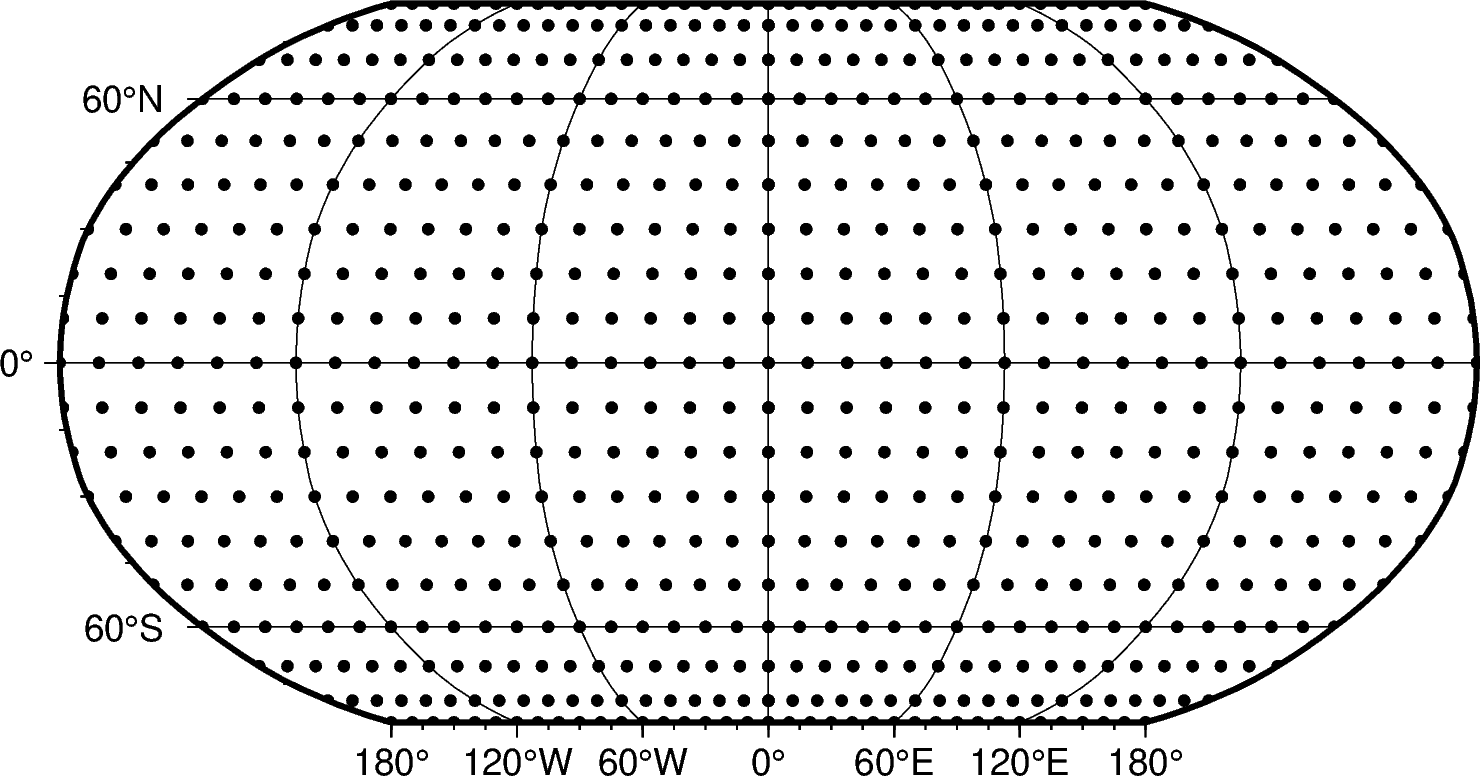

In [20]:

region = [-180, 180, -90, 90]
fig = pygmt.Figure()
fig.basemap(region=region, projection="N12c", frame="afg")
fig.plot(x=coords_orig['longitude'], y=coords_orig['latitude'], style="c0.1c", color="black")
fig.show()

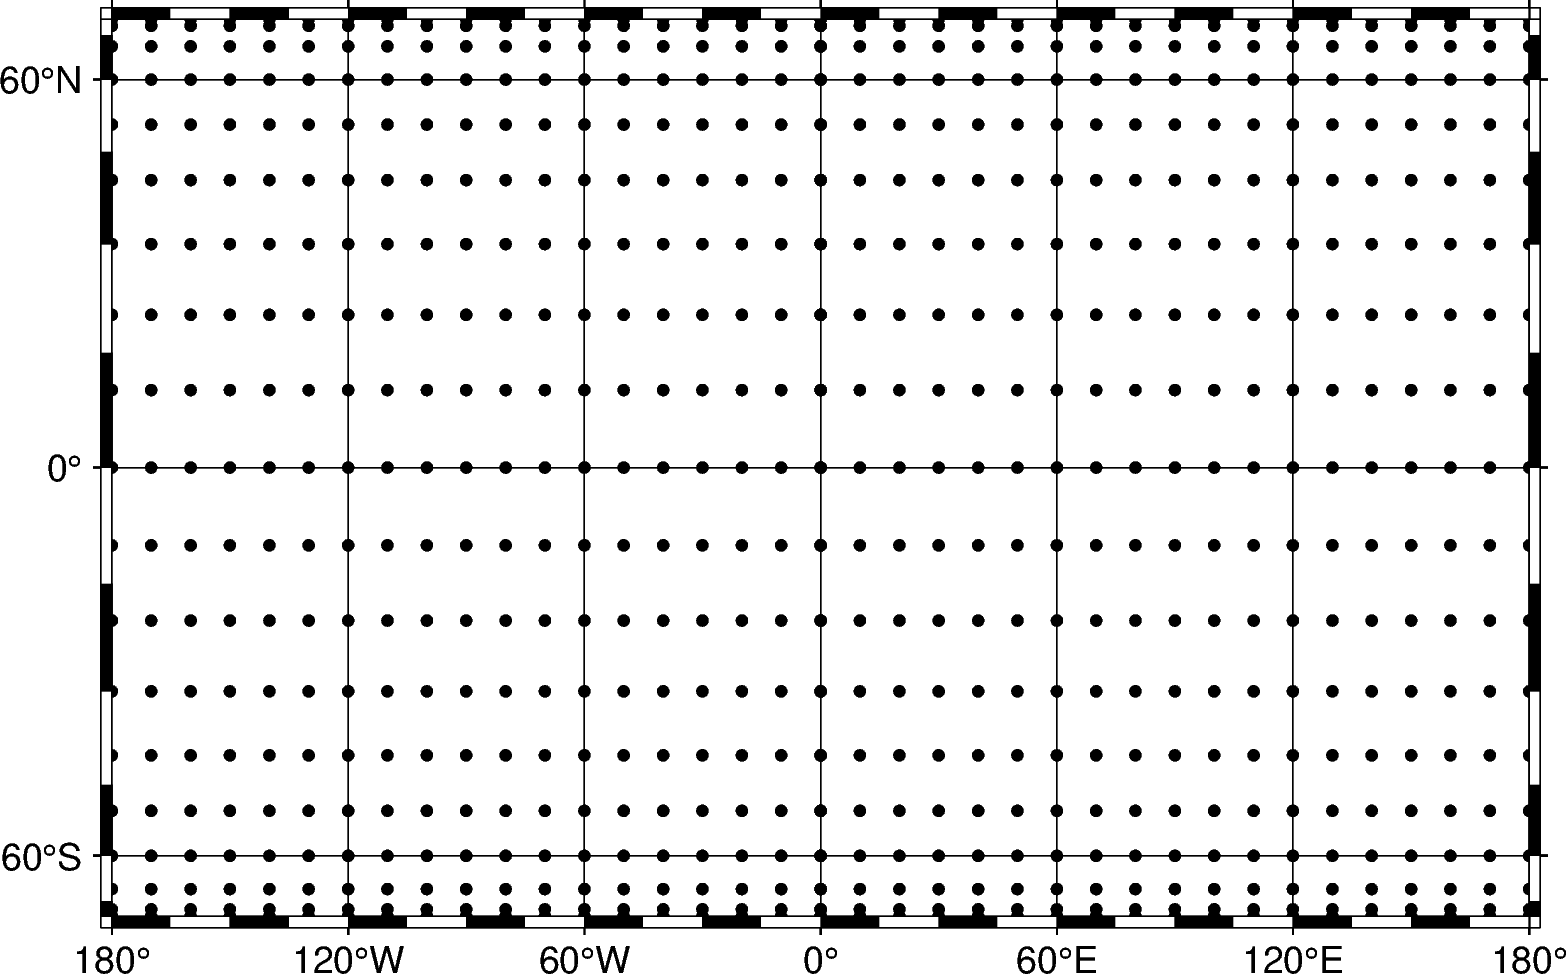

In [7]:
region = [-180, 180, -90, 90]
fig = pygmt.Figure()
fig.basemap(region=region, projection="Y0/45/12c", frame="afg")
fig.plot(x=coords_orig['longitude'], y=coords_orig['latitude'], style="c0.1c", color="black")
fig.show()

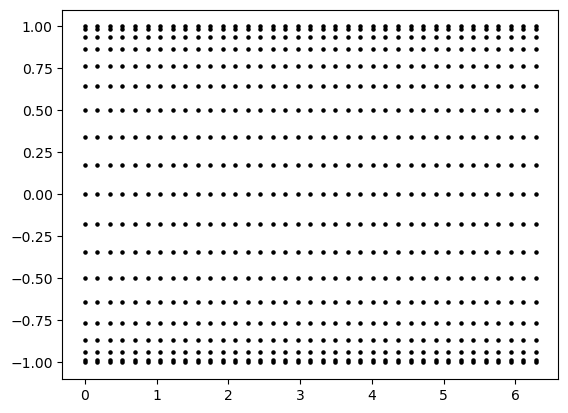

In [17]:
fig = pygmt.Figure()
plt.scatter(coords['longitude'], coords['latitude'], marker ="o", c="black", s=5)

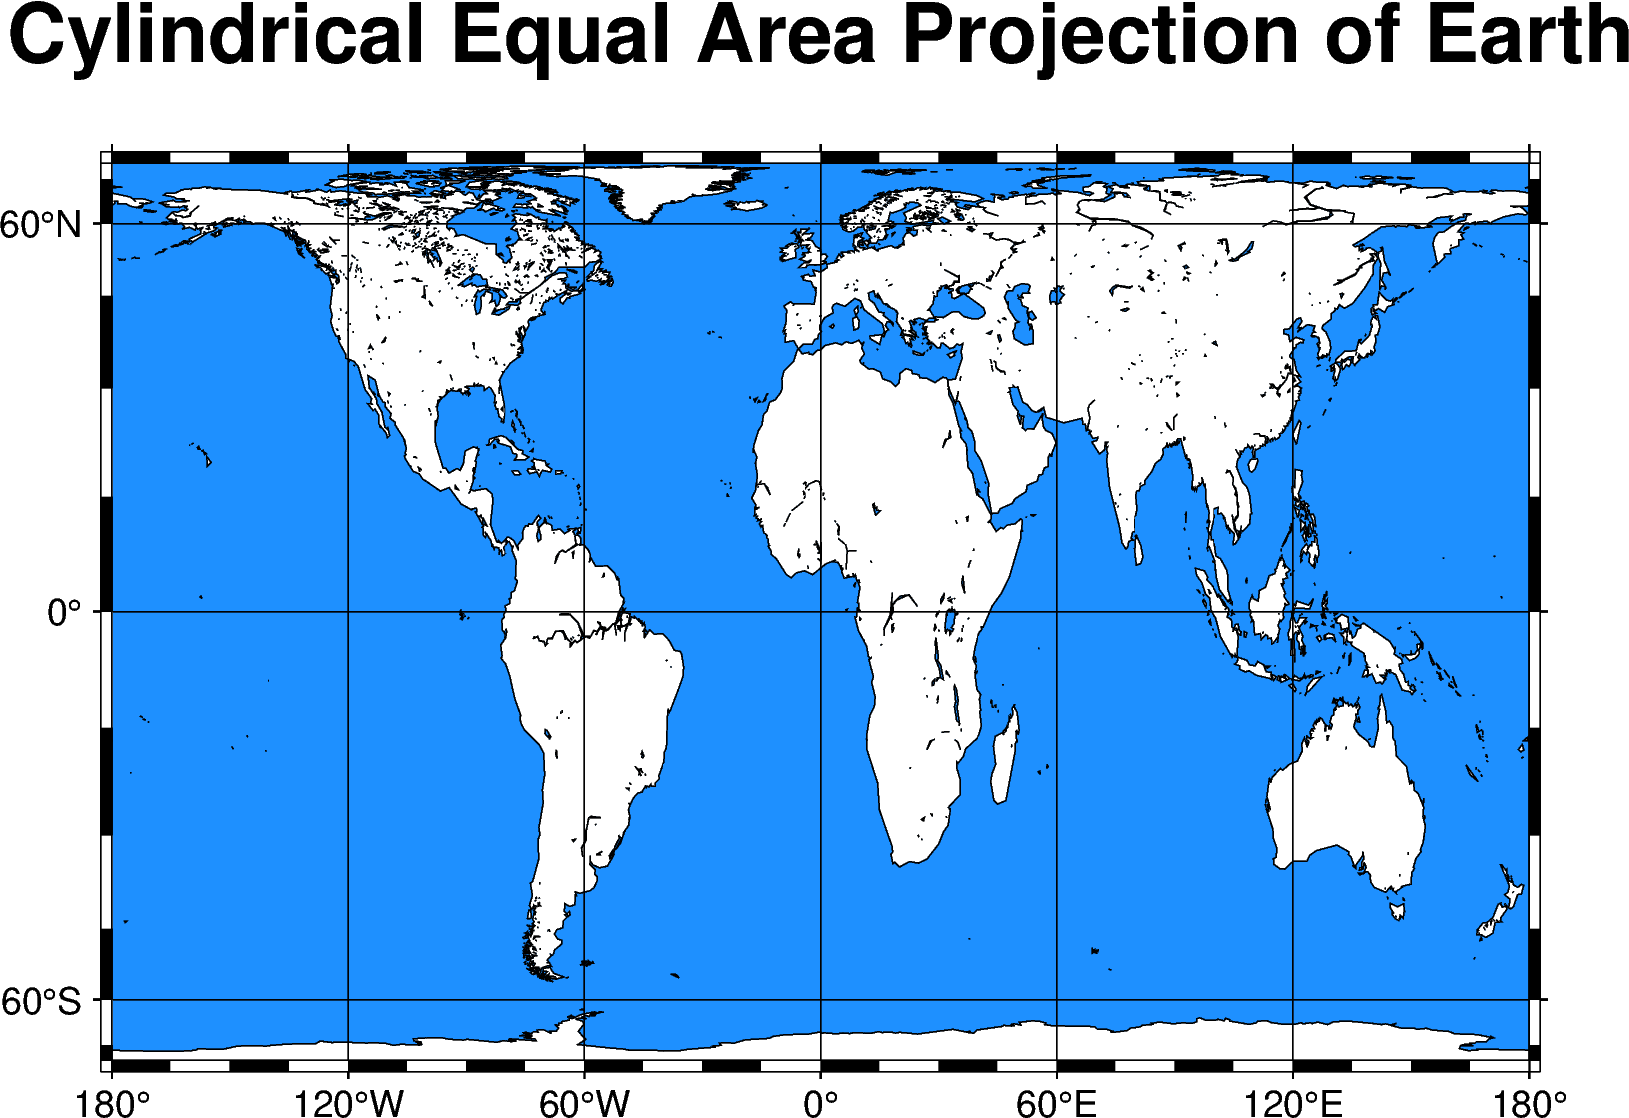

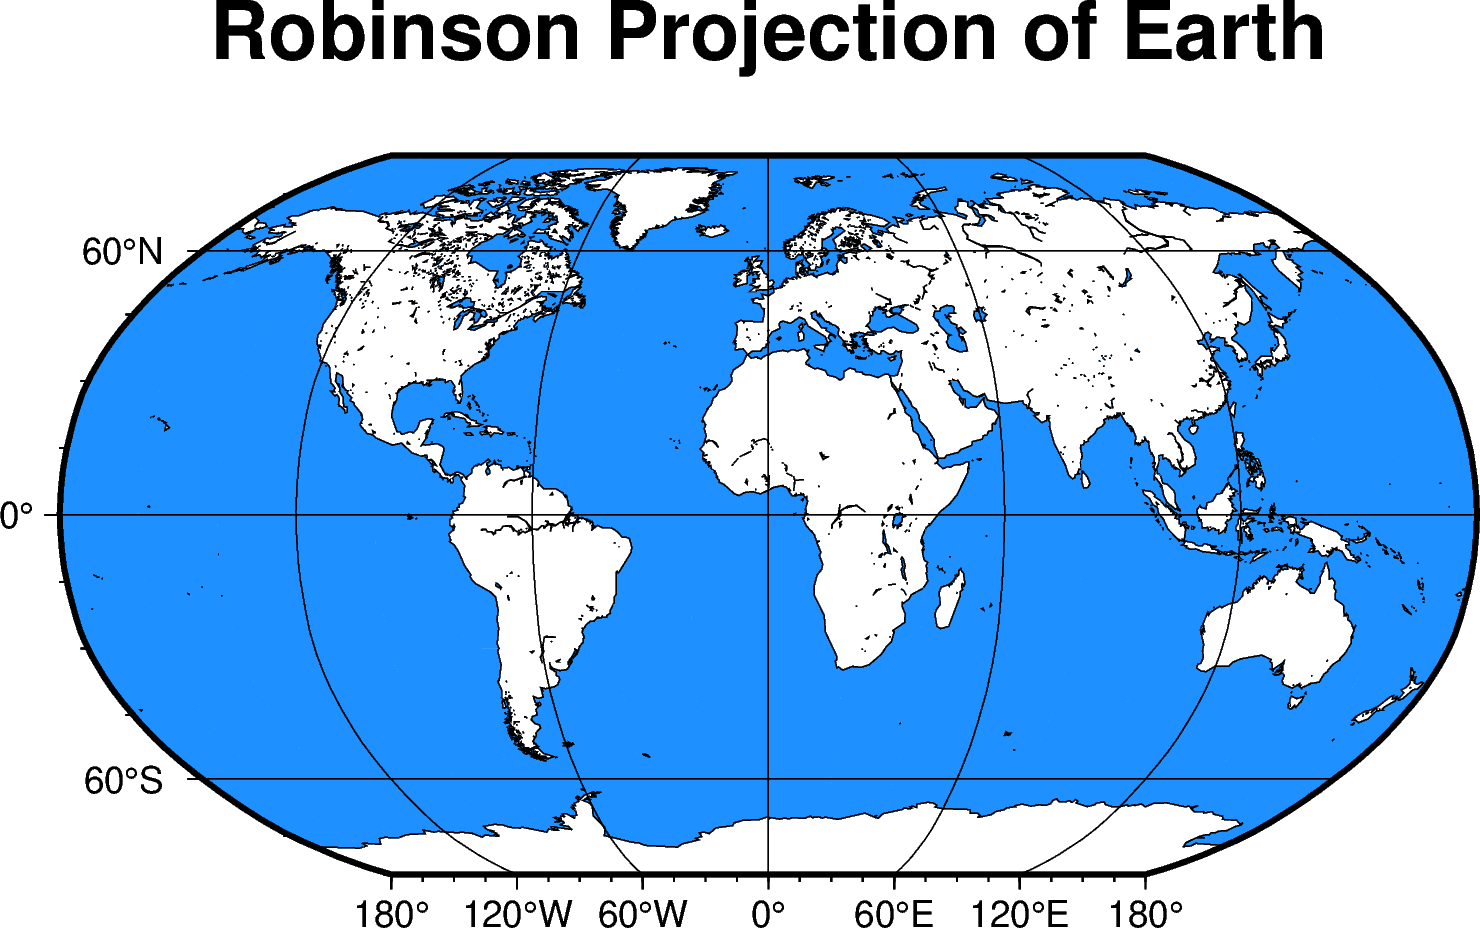

In [49]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pygmt

fig1 = pygmt.Figure()
# Use region "d" to specify global region (-180/180/-90/90)
fig1.coast(
    region="d",
    projection="Y0/45/12c",
    water="dodgerblue",
    shorelines="thinnest",
   frame=["afg", "+tCylindrical Equal Area Projection of Earth"],
)
fig1.show()

fig2 = pygmt.Figure()
# Use region "d" to specify global region (-180/180/-90/90)
fig2.coast(
    region="d",
    projection="N12c",
    water="dodgerblue",
    shorelines="thinnest",

    frame=["afg", "+tRobinson Projection of Earth"],
)
fig2.show()

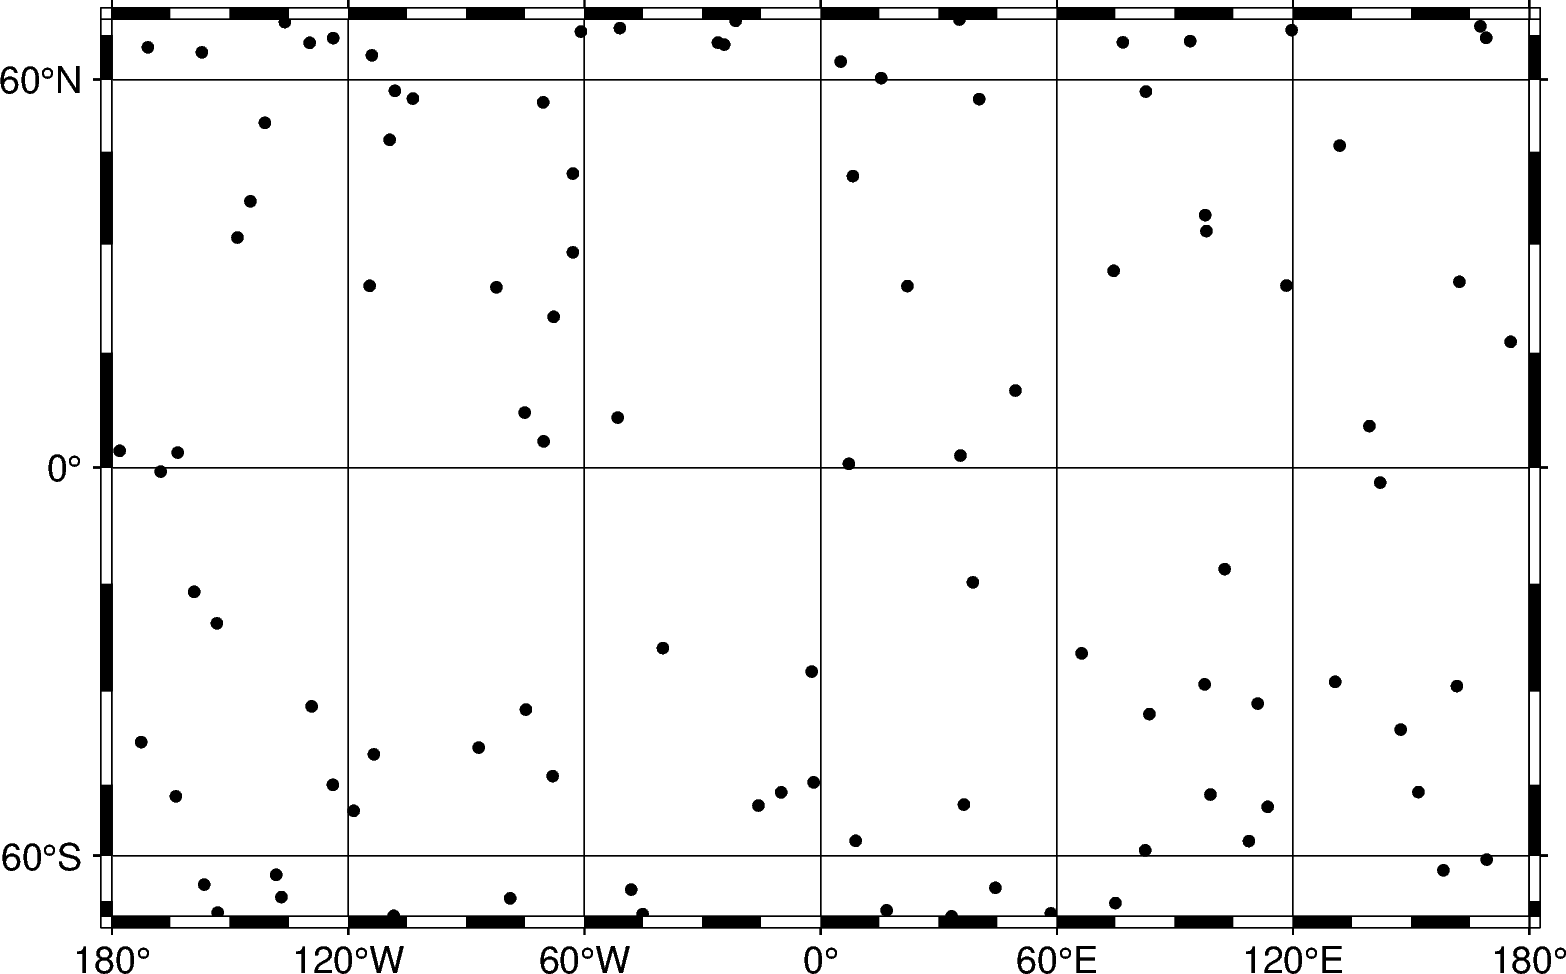

In [2]:
# Generate a random set of points to plot
np.random.seed(42)
region = [-180, 180, -90, 90]
x = np.random.uniform(region[0], region[1], 100)
y = np.random.uniform(region[2], region[3], 100)

fig = pygmt.Figure()
fig.basemap(region=region, projection="Y0/45/12c", frame="afg")
fig.plot(x=x, y=y, style="c0.1c", color="black")
fig.show()